# MNIST Demo - Sklearn SGDClassifier

    actualizado en el trece de octubre de 2020

In [1]:
import os
import pytz
import datetime as dt

# CST = pytz.timezone('Asia/Taipei')

def print_now() -> None:
    print('Local Time = ', \
        dt.datetime.now(pytz.timezone('Asia/Taipei')))

run_in_colab = False
run_in_kaggle = False
run_in_local = False

try:
    from google.colab import drive, files
    run_in_colab = True
except ModuleNotFoundError:
    pass

if run_in_colab:
    drive.mount('/content/drive')
    droot_dir = '/content/drive/My Drive/profundo/'
    data_dir = droot_dir
    output_dir = data_dir
    home_dir = ''
    print('This runtime is running in Google Colab')
else:
    from pathlib import Path
    # rtype = os.environ.get('KAGGLE_KERNEL_RUN_TYPE')
    urlbase = os.environ.get('KAGGLE_URL_BASE')
    home_dir = str(Path.home())
    if urlbase == 'https://www.kaggle.com' and home_dir == '/root':
        run_in_kaggle = True
        home_dir = '/kaggle'
        data_dir = '/kaggle/input'
        output_dir = '/kaggle/working'
        print('This runtime is running Kaggle kernel')
    else:
        from pathlib import Path
        run_in_local = True
        home_dir = str(Path.home())
        droot_dir = home_dir + '/Google Drive/profundo/'
        data_dir = droot_dir
        output_dir = data_dir
        print('This runtime is running in localhost')

print('')
print(f'資料來源目錄是 {data_dir}')
print('')
print(f'輸出結果將儲存在 {output_dir}')
print_now()

Mounted at /content/drive
This runtime is running in Google Colab

資料來源目錄是 /content/drive/My Drive/profundo/

輸出結果將儲存在 /content/drive/My Drive/profundo/
Local Time =  2020-10-12 21:45:43.439732+08:00


In [ ]:
### Modify your directory settings
### 修改資料目錄位置
# where_are_data_from = 'profundo'
# put_data_to = 'profundo'
##########################

# drive.mount('/content/drive')
# data_dir = f'/content/drive/My Drive/{where_are_data_from}/'
# output_dir = f'/content/drive/My Drive/{put_data_to}/'

# print(f'data input dir = {data_dir}')
# print(f'output dir = {output_dir}')


## MNIST Data Source

- [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)
- [Data Repo on GitHub](https://github.com/profundo-lab/datos/tree/master/data)
- [Another copy on Dropbox](https://www.dropbox.com/sh/1w2yqrgyp56w83f/AAAx1b_-IqrJXA6wFzy4Cx1Ya?dl=0)
- [國家高速網路與計算中心資料集平台](https://scidm.nchc.org.tw/dataset/mnist)
---------

- [train data](https://github.com/profundo-lab/aventura/raw/master/data/train-images-idx3-ubyte.gz) (train_X)
- [test data](https://github.com/profundo-lab/aventura/raw/master/data/t10k-images-idx3-ubyte.gz)  (test_X)
- [train label](https://github.com/profundo-lab/aventura/raw/master/data/train-labels-idx1-ubyte.gz) (train_y)
- [test label](https://github.com/profundo-lab/aventura/raw/master/data/t10k-labels-idx1-ubyte.gz) (test_y)


In [2]:
import struct
import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        if dims == 3:
            n = struct.unpack('>I', f.read(4))[0]
            r = struct.unpack('>I', f.read(4))[0]
            c = struct.unpack('>I', f.read(4))[0]
            # shape = (n, r, c)
        else:
            n = struct.unpack('>I', f.read(4))[0]
            # shape = (n)
        # print('idx shape =', shape)
        return np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

## Fetching and Converting Data

In [3]:
%%time

from os import path

pickle_file = 'float_mnist.pkl'
mnist_dir = path.join(data_dir, 'mnist/')

train_data_file = 'train-images-idx3-ubyte'
train_label_file = 'train-labels-idx1-ubyte'
test_data_file = 't10k-images-idx3-ubyte'
test_label_file = 't10k-labels-idx1-ubyte'

train_data = read_idx(mnist_dir + train_data_file)    # train_x
train_data = np.reshape(train_data, (60000, 28*28)).astype(np.float)
train_label = read_idx(mnist_dir + train_label_file)  # train_y

test_data = read_idx(mnist_dir + test_data_file)      # test_x
test_data = np.reshape(test_data, (10000, 28*28)).astype(np.float)
test_label = read_idx(mnist_dir + test_label_file)

print('converting idx-coded data done')
print_now()

converting idx-coded data done
Local Time =  2020-10-12 21:45:59.119557+08:00
CPU times: user 38.2 ms, sys: 99.1 ms, total: 137 ms
Wall time: 4.84 s


In [4]:
print(f'data set dtype = {train_data.dtype, test_data.dtype}')
print(f'label set dtype = {train_label.dtype, test_label.dtype}')

data set dtype = (dtype('float64'), dtype('float64'))
label set dtype = (dtype('uint8'), dtype('uint8'))


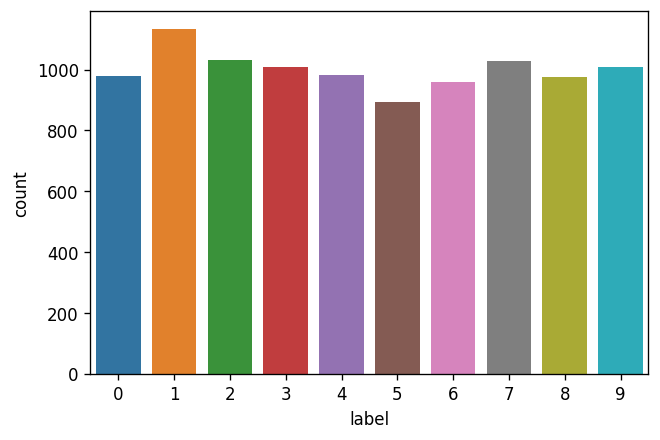

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

_, ax = plt.subplots(figsize=(6, 4), dpi = 120)
cnt = pd.DataFrame(data=test_label, columns=['label'])
sns.countplot(x='label', data=cnt, ax=ax)

In [6]:
import matplotlib.pyplot as plt

def display_digit(data, index) -> None:
    assert index < len(data), f'index must be betwen 0 and {len(data)-1:d} '
    d = data[index].reshape(28, 28)
    plt.imshow(d, cmap='gray_r')
    plt.grid(b='on', which='major')

def display_digit_hex(data, index) -> None:
    assert index < len(data), f'index must be betwen 0 and {len(data)-1:d} '
    d = data[index].reshape(28, 28).astype(np.int)
    for row in range(0, 28):
        for col in range(0, 28):
            print("%02X " % d[row][col], end="")
        print("") 

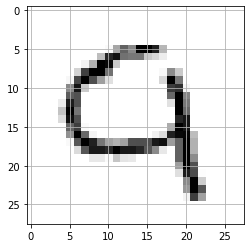

In [7]:
wanna_see = 9876

display_digit(train_data, wanna_see)

In [8]:
wanna_see = 9876
d = train_data[wanna_see].reshape(28, 28).astype(np.int)
df = pd.DataFrame(data=d)
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,5,89,156,119,255,254,223,72,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,65,217,239,142,135,136,53,39,18,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,13,79,254,247,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,43,192,253,254,142,0,0,0,0,0,0,7,115,53,0,0,0,0,0,0,0,0
9,0,0,0,0,0,8,183,253,177,96,31,0,0,0,0,0,0,40,253,135,0,0,0,0,0,0,0,0


- add noise

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,46,17,9,74,34,16,26,52,72,23,24,8,13,59,19,14,56,78,70,18,69,44,37,26,60,11,60,32
1,8,30,68,58,55,10,36,7,1,19,51,10,69,29,41,11,72,14,75,22,1,51,21,40,4,19,34,14
2,2,78,26,39,78,45,17,30,75,13,71,62,43,77,31,6,17,7,62,41,27,5,51,48,27,43,69,10
3,57,12,27,1,60,27,26,69,15,79,78,74,76,46,15,9,30,58,55,8,30,40,34,3,48,46,10,34
4,53,7,9,56,49,40,10,20,79,70,49,67,73,63,72,64,4,19,72,45,13,45,69,39,5,0,49,14
5,44,10,55,79,54,25,60,56,58,54,53,36,56,54,93,42,197,172,203,26,230,297,272,186,61,28,21,16
6,31,21,69,56,15,63,78,64,61,54,111,221,208,312,312,290,299,281,258,172,295,290,212,113,38,15,73,47
7,54,19,23,23,12,33,71,64,253,298,286,320,307,309,311,300,309,315,168,128,90,97,88,47,60,79,74,66
8,68,66,79,6,45,7,22,53,258,287,265,285,275,321,230,239,264,264,37,49,20,43,23,37,0,30,43,48
9,68,47,37,40,63,59,52,33,125,156,146,324,265,278,87,43,106,161,2,14,12,61,36,34,30,15,71,30


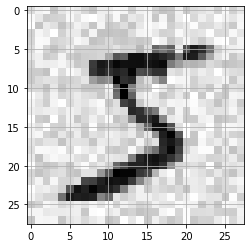

In [9]:
wanna_see = 0
d = train_data[wanna_see].reshape(28, 28).astype(np.int)

noise = np.random.rand(28, 28) * 80
noise = noise.astype(np.int)
d += noise

plt.imshow(d, cmap='gray_r')
plt.grid(b='on', which='major')
    
df = pd.DataFrame(data=d)
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

- [how to shift a 2d array](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html)

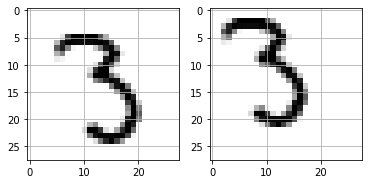

In [11]:
from scipy.ndimage import shift

wanna_see = 8888
d = train_data[wanna_see].reshape(28, 28).astype(np.int)

d2 = shift(d, (-3, -3))
# noise = np.random.rand(28, 28) * 80
# noise = noise.astype(np.int)
# d += noise

fig, ax = plt.subplots(1, 2)

ax[0].imshow(d, cmap='gray_r')
ax[0].grid(b='on', which='major')
ax[1].imshow(d2, cmap='gray_r')
ax[1].grid(b='on', which='major')
# plt.imshow(d, cmap='gray_r')
# plt.grid(b='on', which='major')
# plt.show()
# plt.imshow(d2, cmap='gray_r')
# plt.grid(b='on', which='major')
# plt.show()

## SGDClassifier

- [sklearn.liner_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [17]:
%%time

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

label_smoothing, data_preprocessed = False, None

if label_smoothing:
    # label smoothing
    fac = 0.99 / 255
    train_data = train_data * fac + 0.01
    test_data = test_data * fac + 0.01
    data_preprocessed = 'Label Smoothing'
else:
    # feature scaling
    normalizer = MinMaxScaler()
    train_data = normalizer.fit_transform(train_data)
    test_data = normalizer.fit_transform(test_data)
    data_preprocessed = 'Normalized'

# model = LogisticRegression(max_iter=500, solver='saga', tol=0.1, penalty='l1')

# same as LogisticRegression
model = SGDClassifier(loss='log', penalty='l1', max_iter=500)

# generic linear model classifier (loss esimated by stochastic gradient descent)
# model = SGDClassifier(loss='hinge', penalty='l2', max_iter=500)

# train_data = x_train, test_data = x_test
# train_label = y_train, test_label = y_test = y_true

model.fit(train_data, train_label)
y_pred = model.predict(test_data)

print('\n-----------------------------')
print('Stochastic Gradient Descent Classifier')
print(f'Data Preprocessing : {data_preprocessed}')
print(f'training set score : {model.score(train_data, train_label):.4f}')
print(f'test set score     : {model.score(test_data, test_label):.4f}')
print('------------------------------')
print_now()


-----------------------------
Stochastic Gradient Descent Classifier
Data Preprocessing : Normalized
training set score : 0.9149
test set score     : 0.9087
------------------------------
Local Time =  2020-10-12 21:51:39.926501+08:00
CPU times: user 2min 17s, sys: 70.9 ms, total: 2min 17s
Wall time: 2min 17s


## history record for reference

    Stochastic Gradient Descent Classifier

    Data Preprocessing : Label Smoothing

    training set score : 0.9207

    test set score     : 0.9170

    CPU times: user 23.3 s, sys: 223 ms, total: 23.5 s

    Wall time: 23.7 s

    --------------

    Stochastic Gradient Descent Classifier

    Data Preprocessing : Normalized

    training set score : 0.9198

    test set score     : 0.9181

    CPU times: user 24.4 s, sys: 149 ms, total: 24.6 s

    Wall time: 24.4 s


# Supplementary helpers

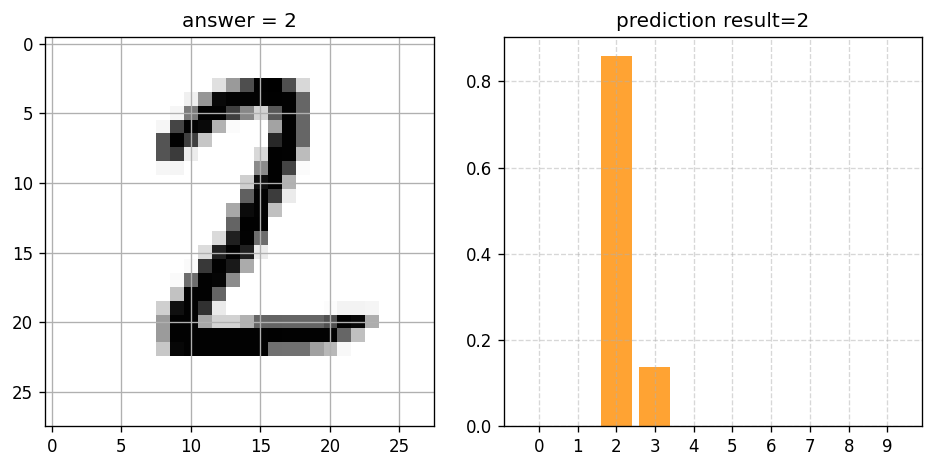

In [18]:
import matplotlib.pyplot as plt

def single_digit_prediction(model, data, label, dindex) -> None:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=120)

    d = data[dindex].reshape(28, 28)
    ax[0].imshow(d, cmap='gray_r')
    ax[0].grid(b='on', which='major')
    ax[0].set_title(f'answer = {label[dindex]}')

    probs=model.predict_proba([data[dindex]])[0]
    ax[1].bar(range(10), probs, color='darkorange', alpha=0.8)  
    ax[1].set_xticks(range(10))
    ax[1].set_xticklabels(['%d' % x for x in range(10)])
    ax[1].set_title('prediction result=%d' % np.argmax(probs))
    ax[1].grid(b='on', alpha=0.5, ls='--')
    plt.tight_layout()

single_digit_prediction(model, test_data, test_label, 1237)

In [19]:
from sklearn.metrics import classification_report
#
# print the classfication_report prepared and 
# formatted by sklearn
#
rep = classification_report(test_label, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.87      0.89      1032
           3       0.89      0.92      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.87      0.85      0.86       892
           6       0.94      0.92      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.85      0.84      0.84       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



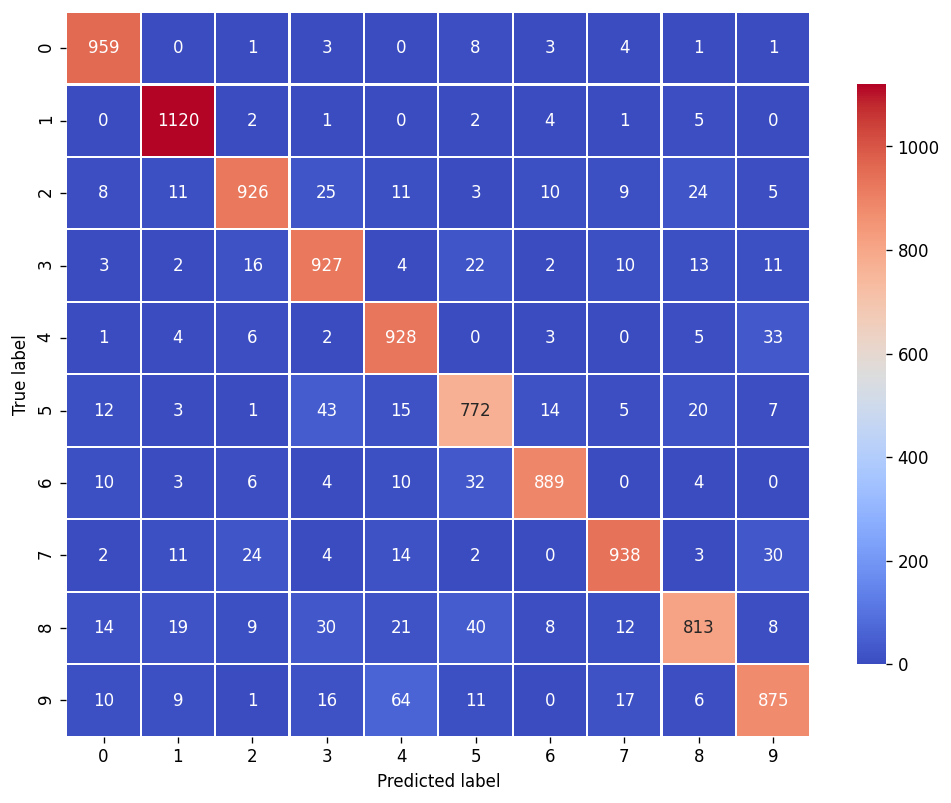

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def sns_confusion_matrix(the_matrix, figsize=(10, 8), dpi=100, cmap='Blues') -> None:
    _, ax = plt.subplots(figsize=figsize, dpi=dpi)
    """
    the_matrix: confusion matrix produced by 
                sklearn.metrics.confusion_matrix()
    """
    sns.heatmap(the_matrix, annot=True, cmap=cmap,
        cbar_kws={'shrink': .8},
        fmt='d', linewidth=0.8, ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

cm = confusion_matrix(test_label, y_pred)
sns_confusion_matrix(cm, dpi = 120, cmap = 'coolwarm')

# End of File